### import packages

In [155]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

### Load data with pandas

In [156]:
train_df = pd.read_csv('../input/train.csv', index_col='Id')
test_df = pd.read_csv('../input/test.csv', index_col='Id')

In [157]:
train_df.info()
print('------------------------------')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [158]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [159]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### explore data

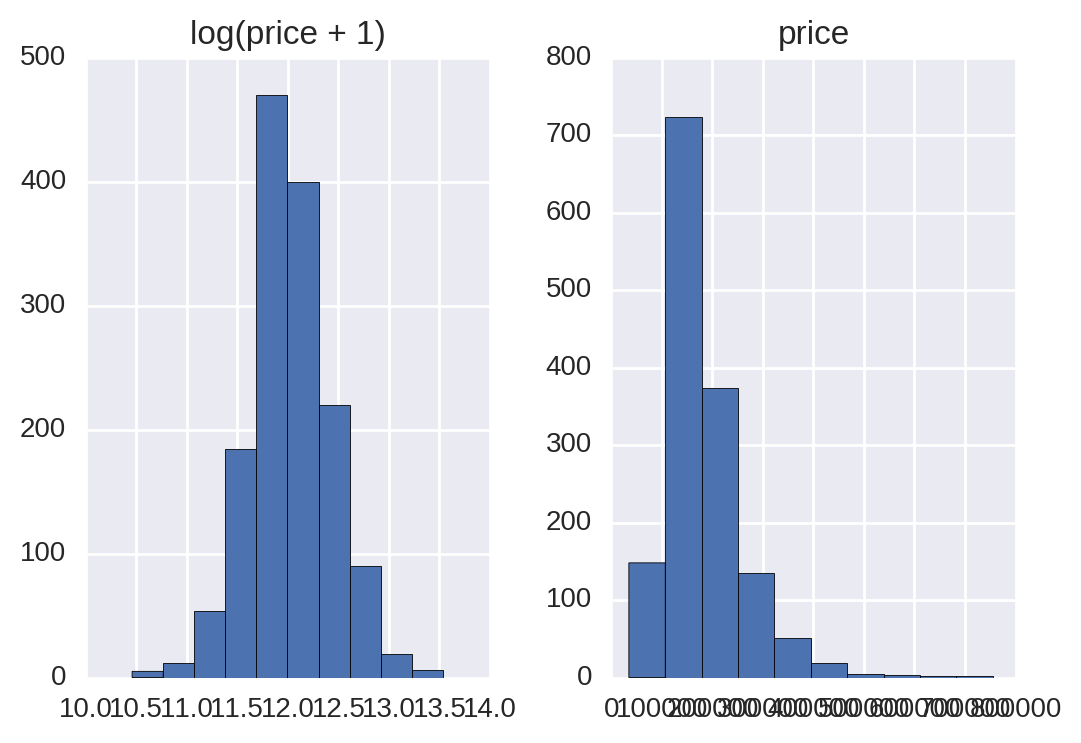

In [160]:
import matplotlib
plt.figure(figsize=(3, 18))
prices = pd.DataFrame({"price":train_df["SalePrice"], "log(price + 1)":np.log1p(train_df["SalePrice"])})
prices.hist()
target = np.log1p(prices.price)

In [178]:
concat = pd.concat([train_df.drop(['SalePrice'], axis=1), test_df])

numFeat = concat.dtypes[concat.dtypes != object].index
strFeat = concat.dtypes[concat.dtypes == object].index
floatFeat = concat.dtypes[concat.dtypes == float].index
concat[strFeat] = concat[strFeat].fillna('NA')

In [179]:
from scipy.stats import skew
concat_skew = concat[numFeat].apply(lambda x : skew(x.dropna()))
train_skew = train_df[numFeat].apply(lambda x : skew(x.dropna()))
#pd.DataFrame([concat_skew, train_skew], index=['concat', 'train']).T.sort_values(by='concat', ascending=False)
skew_feat = concat_skew[concat_skew > 0.75].index
concat[skew_feat] = np.log1p(concat[skew_feat])

### Murge training data and test data
For more reliable data distribution to analyse we combine train data and test data

### Numerical Features
Fill nan numerical features with mean of column lucky that NAN are much fewer than valid integers
### Non-numerical Features(string features) 
As the 'NA' value has special meaning in the object type variables, replace them with "NA" instead of guessing their value

In [180]:
concat[floatFeat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 11 columns):
LotFrontage     2433 non-null float64
MasVnrArea      2896 non-null float64
BsmtFinSF1      2918 non-null float64
BsmtFinSF2      2918 non-null float64
BsmtUnfSF       2918 non-null float64
TotalBsmtSF     2918 non-null float64
BsmtFullBath    2917 non-null float64
BsmtHalfBath    2917 non-null float64
GarageYrBlt     2760 non-null float64
GarageCars      2918 non-null float64
GarageArea      2918 non-null float64
dtypes: float64(11)
memory usage: 273.7 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdda5539d50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdda4a7bfd0>]], dtype=object)

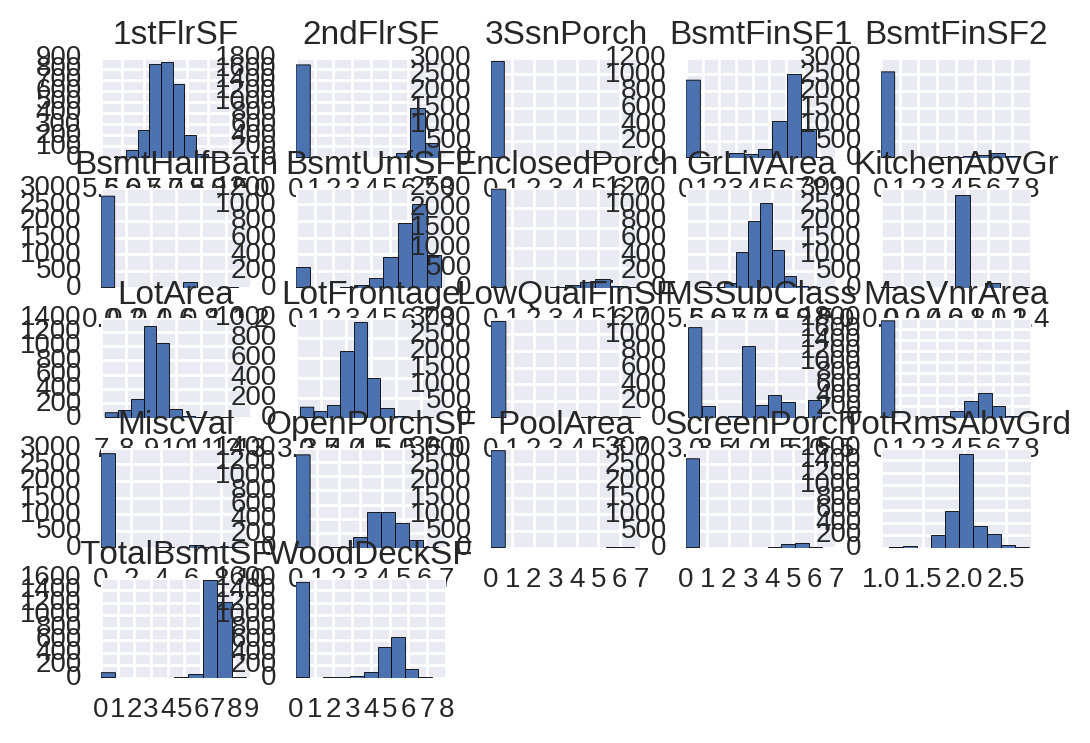

In [185]:
concat[skew_feat].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdda4056810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdd9fa0c190>]], dtype=object)

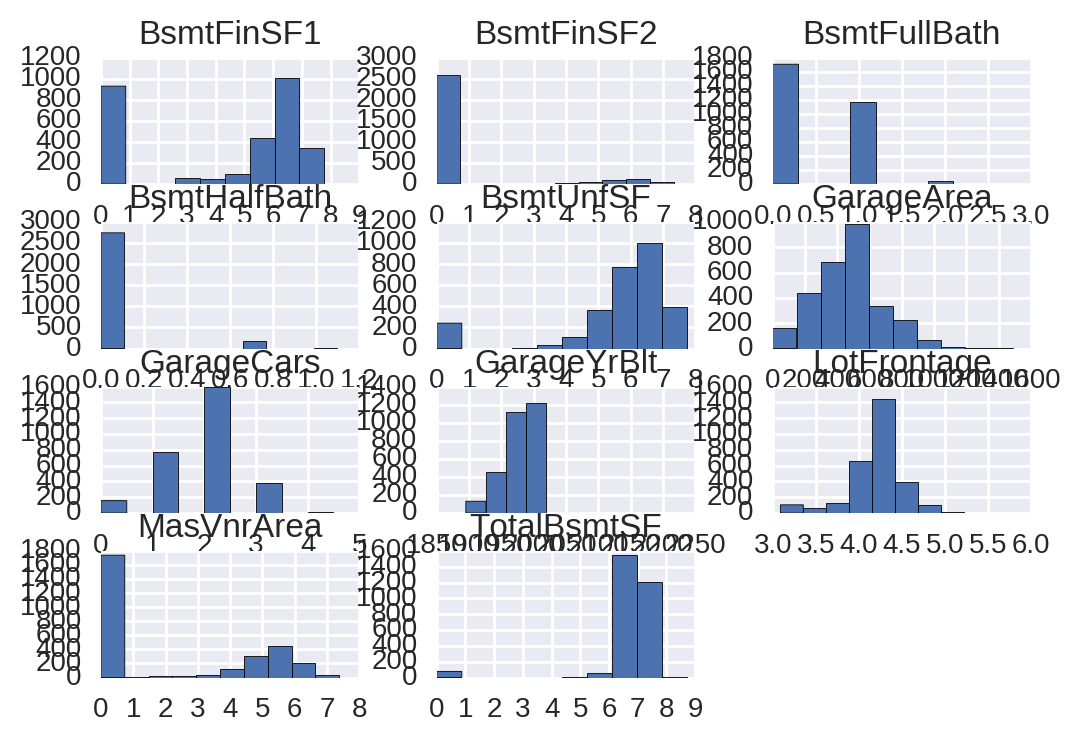

In [186]:
concat[floatFeat].fillna(concat[floatFeat].mean()).hist()

In [187]:
concat[floatFeat] = concat[floatFeat].fillna(concat[floatFeat].mean())

concat[numFeat] = concat[numFeat].astype(float)
concat = concat.join(pd.get_dummies(concat[strFeat]))
concat.drop(strFeat, inplace=True, axis=1)

In [188]:
# return to train_df and test_df
train_df = concat[:train_df.shape[0]]
test_df = concat[train_df.shape[0]:]

### Models
With package __scikit learn__.
Preprocessing Steps:
> 1. User Stander scale with matrix
> 2. Try classic tree-like model to calculate feature importance
> 3. 

In [189]:
from sklearn.cross_validation import cross_val_score

def rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train_df.values, y=target, scoring='mean_squared_error'))
    return rmse.mean()

def get_result(model, desc):
    y_pred = np.expm1(model.predict(test_df.values))
    output_name = '../output/' + desc + '.csv'
    output(output_name, y_pred)

def output(path, y_pred):
    out_df = pd.DataFrame(y_pred, index=test_df.index, columns=['SalePrice'])
    out_df.to_csv(path)

In [190]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

scaler = StandardScaler().fit(train_df)
train = scaler.transform(train_df)
test = scaler.transform(test_df)

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.33, random_state=42)

### Random Forest

In [191]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, n_jobs=7)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=7, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [193]:
rmse(rf_model)

0.14589212847794239

In [196]:
importance = pd.Series(model.feature_importances_, index=train_df.columns).sort_values(ascending=False)

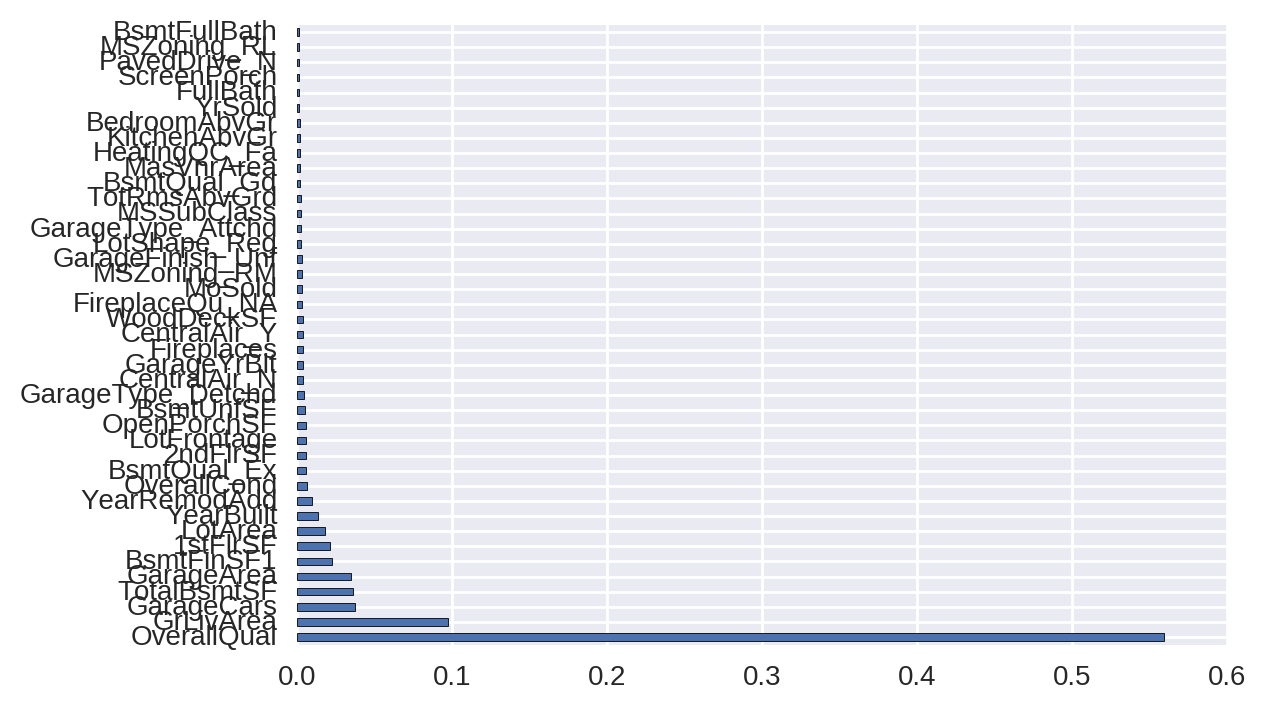

In [197]:
importance[importance > 1e-3].plot(kind='barh')

### Lasso

In [200]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1e-4)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [201]:
pd.Series(lasso_model.coef_, index=train_df.columns).sort_values()

RoofMatl_ClyTile        -0.050142
Condition2_PosN         -0.026663
MSZoning_C (all)        -0.025818
Heating_Grav            -0.021747
GarageQual_Po           -0.019638
Neighborhood_Edwards    -0.017848
Exterior1st_Wd Sdng     -0.017445
SaleCondition_Abnorml   -0.015808
HouseStyle_2Story       -0.014740
Condition1_Artery       -0.013138
Neighborhood_NAmes      -0.013137
Functional_Maj2         -0.012787
MiscFeature_Othr        -0.012557
CentralAir_N            -0.011924
SaleType_WD             -0.011694
Foundation_BrkTil       -0.011205
GarageCond_Ex           -0.011132
BsmtFinType2_BLQ        -0.010900
BsmtQual_TA             -0.010122
BsmtCond_Fa             -0.010088
Neighborhood_MeadowV    -0.009855
BsmtUnfSF               -0.009647
Neighborhood_NWAmes     -0.009585
Exterior1st_CemntBd     -0.009376
KitchenAbvGr            -0.008858
Foundation_Slab         -0.008806
1stFlrSF                -0.008688
Condition1_RRAe         -0.008472
Neighborhood_IDOTRR     -0.008362
Neighborhood_O

In [203]:
rmse(lasso_model)

0.12709737764231024

In [67]:
alpha = np.arange(1e-5, 1e-3, 1e-5)
[rmse(Lasso(alpha=a)) for a in alpha]

[0.14932742418128508,
 0.14840515745969043,
 0.14752369050681371,
 0.14652165835595268,
 0.14556499011720972,
 0.1446757226515224,
 0.14388576568393341,
 0.14321234260599899,
 0.14263502044338353,
 0.14214164875533439,
 0.14162457330057387,
 0.14105918811410811,
 0.14053429553855457,
 0.14011696626747341,
 0.13983933465005585,
 0.13958223958066332,
 0.1393570190024023,
 0.1391900493998027,
 0.13903905130615038,
 0.13886735671076467,
 0.13869512894255942,
 0.13855729325389218,
 0.13845464652548187,
 0.13838753369679072,
 0.1383284261219305,
 0.13826600891101307,
 0.13820663543803977,
 0.13815622621388404,
 0.13810407310263997,
 0.13805435630170251,
 0.13800803716651136,
 0.13796240628747045,
 0.13791603249977416,
 0.13787414723642163,
 0.13784612151418982,
 0.13783237776366153,
 0.13783098702148719,
 0.1378325766849039,
 0.1378336176647085,
 0.13783776619535237,
 0.13784056312942369,
 0.13784496749941086,
 0.13785742909604615,
 0.13787375113500097,
 0.13789150173228559,
 0.1379174335142

### GBDT && XGBOOST

In [149]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=400)
rmse(xgb)
xgb.fit(train_df.values, target)
get_result(xgb, desc='xgb') # A bit lower in scoring than gbdt

In [122]:
gbdt = GradientBoostingRegressor(n_estimators=500)
print model
rmse(model)
gbdt.fit(train_df.values, target)
get_result(gbdt, 'gbdt') # Kaggle scoring 0.13194 

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)


### Grid Parameter CV Search 

In [152]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
gbdt = GradientBoostingRegressor(learning_rate=0.1)
grid = { 
    'learning_rate' : [0.1, 0.05, 0.2, 0.01],
    'n_estimators' : [100, 200, 500],
    'max_depth' : [3, 4, 5]
}
search = GridSearchCV(gbdt, grid, scoring='mean_squared_error')
print GridSearchCV
search.fit(X_train, y_train)

<class 'sklearn.grid_search.GridSearchCV'>


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 500], 'learning_rate': [0.1, 0.05, 0.2, 0.01], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

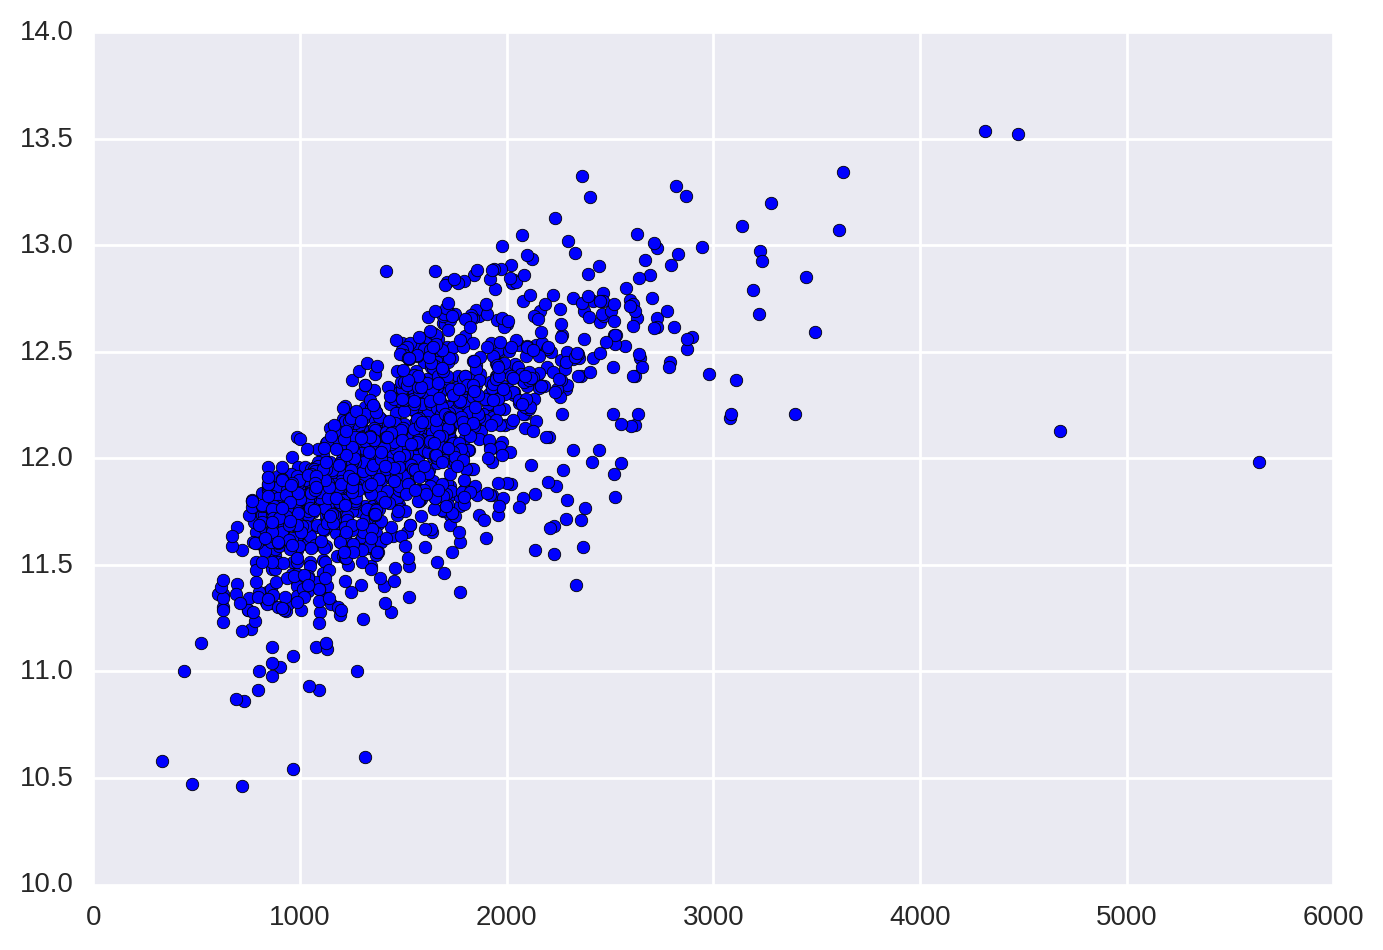

In [154]:
plt.scatter(train_df.GrLivArea, target)

In [88]:
print search.best_params_
print search.best_estimator_
print np.sqrt(-search.best_score_)

{'n_estimators': 500, 'learning_rate': 0.1, 'max_depth': 3}
GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
0.138886784411


In [229]:
from sklearn.cross_validation import cross_val_score
rf = RandomForestRegressor(n_estimators=1000)
#rf.fit(train_df[bestFeat].values, target)

In [191]:
rmse(rf)

array([ 0.14168532,  0.1558891 ,  0.14050501])

In [196]:
from scipy.stats import pearsonr
pearson = train_df[numFeat].apply(lambda x : pearsonr(x.dropna(), target.ix[x.notnull()])[0])
pearson.sort_values(ascending=False)

OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.501656
Fireplaces       0.489450
MasVnrArea       0.429498
BsmtFinSF1       0.372023
LotFrontage      0.335555
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
dtype: float64

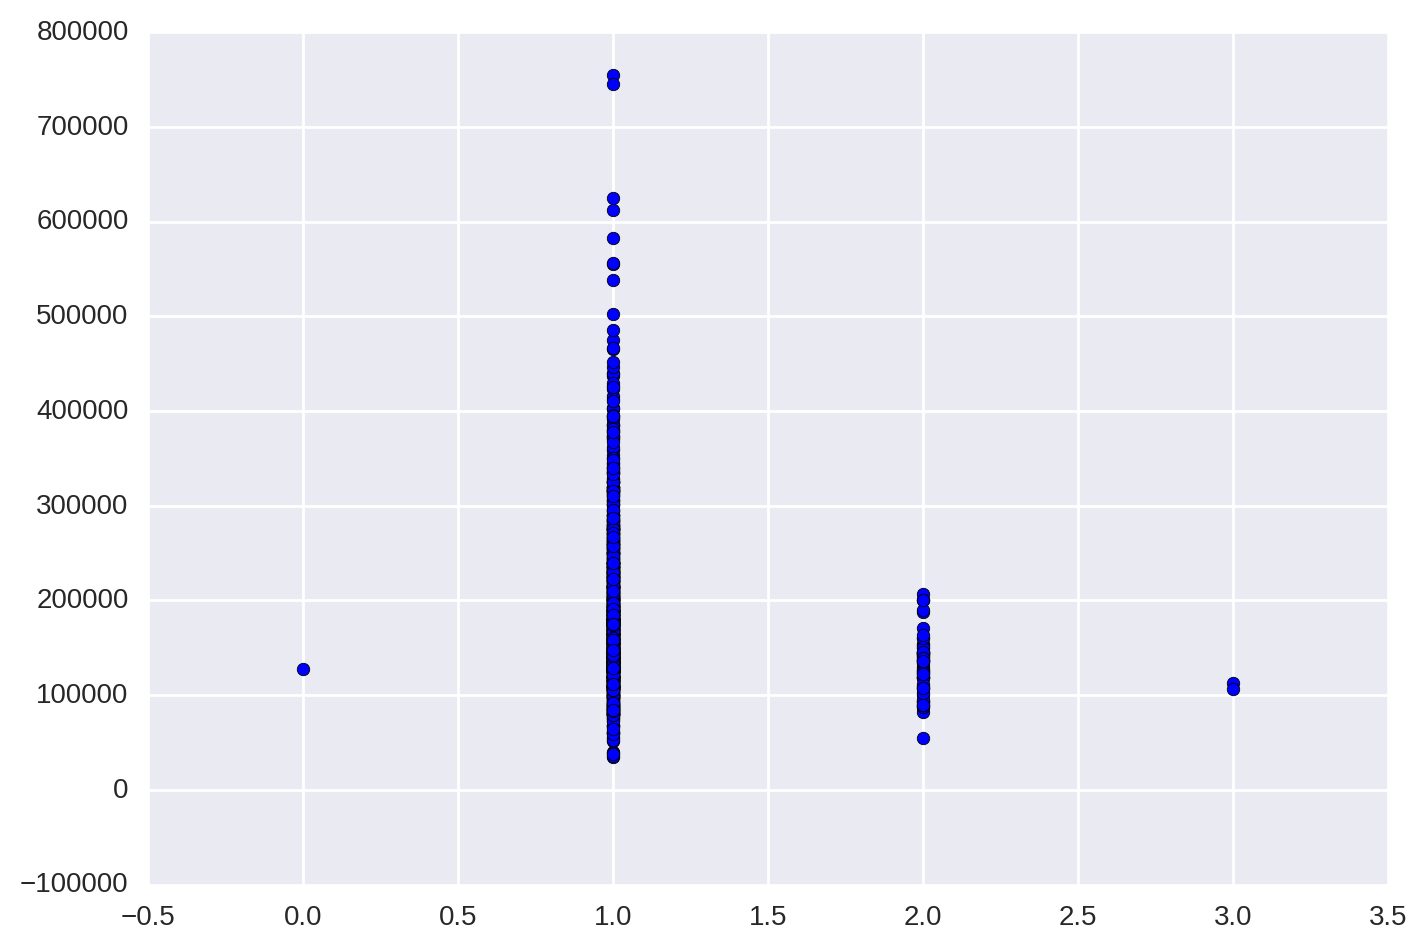

In [85]:
plt.scatter(train_df.KitchenAbvGr, train_df.SalePrice)

In [64]:
train_df[floatFeat].apply(lambda x : pearsonr(x.dropna(), train_df.SalePrice.ix[x.notnull()]))

LotFrontage      (0.351799096571, 2.60244181239e-36)
MasVnrArea       (0.477493047096, 1.45850864259e-83)
BsmtFinSF1       (0.386419806242, 3.39410982929e-53)
BsmtFinSF2        (-0.0113781214502, 0.663998650834)
BsmtUnfSF        (0.214479105547, 1.18297579636e-16)
TotalBsmtSF      (0.613580551559, 9.4842293915e-152)
BsmtFullBath     (0.227122233131, 1.55034413721e-18)
BsmtHalfBath      (-0.0168441542974, 0.520153635728)
GarageYrBlt      (0.486361677488, 8.70512794214e-83)
GarageCars      (0.640409197258, 2.49864416718e-169)
GarageArea      (0.623431438918, 5.26503816798e-158)
dtype: object

In [105]:
train_df.dtypes[train_df.dtypes == float]

LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object

In [106]:
concat.dtypes[concat.dtypes == float]

LotFrontage     float64
MasVnrArea      float64
BsmtFinSF1      float64
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
BsmtFullBath    float64
BsmtHalfBath    float64
GarageYrBlt     float64
GarageCars      float64
GarageArea      float64
dtype: object

In [118]:
type(train_df.LotFrontage[8])

numpy.float64

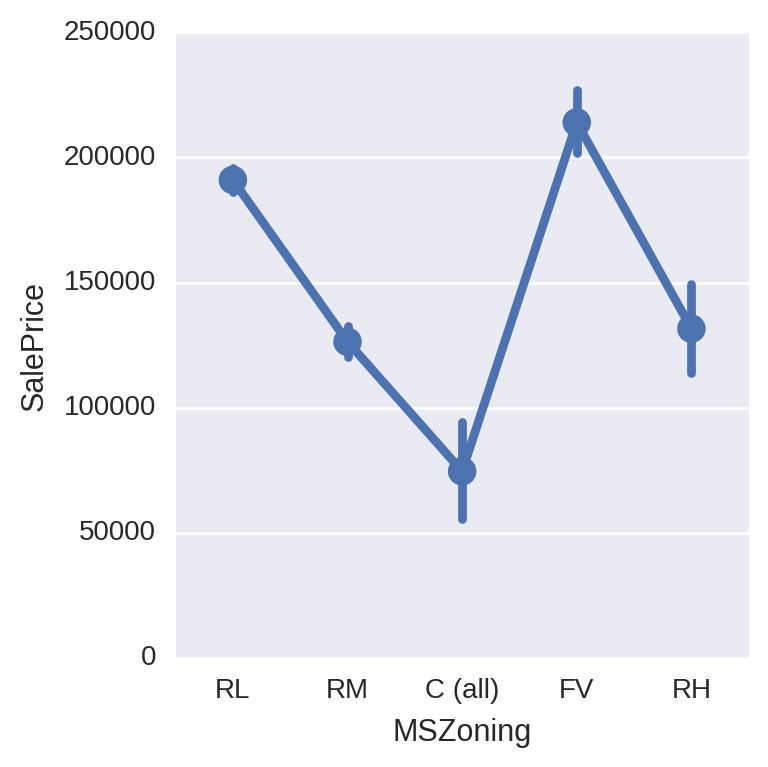

In [121]:
sns.factorplot(x='MSZoning', y='SalePrice', data=train_df)

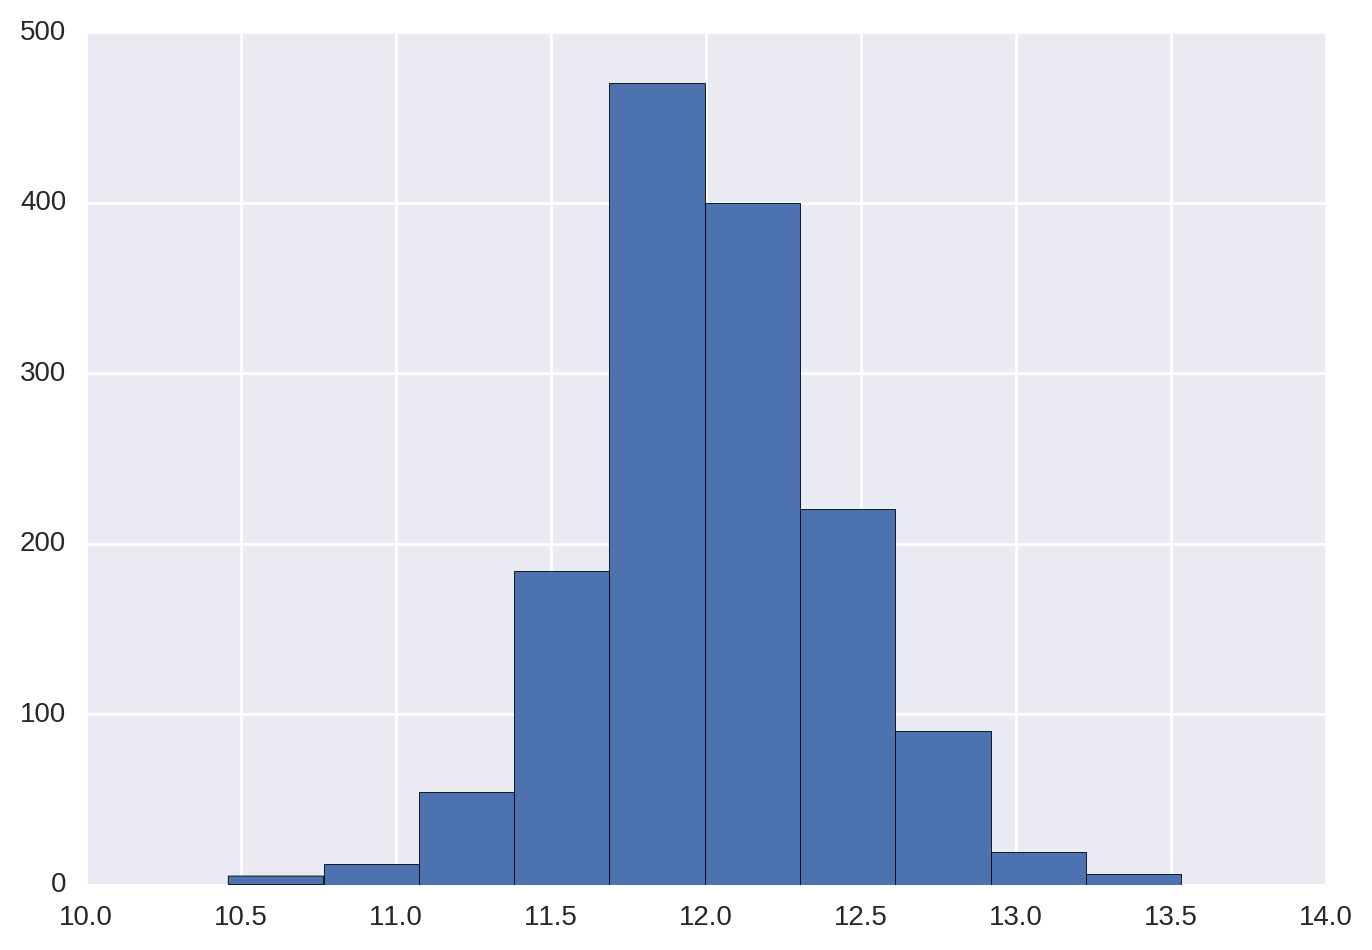

In [11]:
np.log1p(train_df.SalePrice).hist()